<a href="https://colab.research.google.com/github/markbriers/data-science-jupyter/blob/main/week7-notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelling part 2 (Week 7)

Code at: https://github.com/markbriers/data-science-jupyter

## Recap - the story so far

Our goal is to follow a data science process (CRISP-DM) to deliver a successful business outcome.

Our learning objectives are as follows:

* Describe the six stages of a data processing pipeline (using CRISP-DM)

* Demonstrate an understanding of the python programming language through the production of elementary data analysis programme

* Analyse at least three different data sources by applying at least one python data processing library to extract and explore pertinent features

* Be able to design a set of data requirements for a specified business problem

* Describe and apply (using the python programming language) the main approaches to supervised learning for a given classification problem

* Understand the use cases of Big Data technology (in particular Spark)

* Produce a report including appropriate data visualisations covering the analysis of a business problem using a data science based approach

## Learning outcome

* By the end of the lecture, you will be able to use the tensorflow library to estimate parameters of a simple linear model using the gradient descent algorithm.

* By the end of the lecture, you will be able to use the tensorflow library to estimate parameters of a deep neural network.

## Optimisation with tensorflow

During week 6, we introduced the concept of a gradient. *The gradient can be interpreted as a mathematical description of the direction and rate of fastest ascent.*

A statistical model allows us to produce a generalised mathematical description of a sample - allowing us to extrapolate, or predict, the value of a *dependent variable* (i.e. the output) from one or more *independent variables* (i.e. inputs). To fit a statistical model to the data, we often specify an *objective function* (or loss function), which provides a basis on which we can estimate parameters of the model.

For a given model (e.g. linear model - a straight line) and loss function (e.g. sum of squared errors) we can produce an estimate of the parameters (e.g. $a,b$ in $y=ax+b$) by minimising the loss.

This minimisation problem is known as an *optimisation problem*. The optimisation process is a significant part of the machinery of data science modelling.

There are many optimisation procedures available. Perhaps the most widely used (within data science) is that of *gradient descent*. Quite simply, gradient descent is a mechanism for "walking down a hill" in order to reach the parameters that are (locally) minimum. We use the loss function's gradient vector in order to "take a step in the direction of the steepest descent".

Let's start by revisiting the computation of a gradient using the tensorflow library. Thankfully, tensorflow takes away all of the mathematical complexity involved in differentiation. We can compute the gradient of a function at a particular point using tensorflow's automatic differentiation feature:

In [1]:
import tensorflow as tf

Recall that the differential of $y=x^2$ is equal to $\frac{dy}{dx} = 2x$. So, to find the gradient at any particular point of interest, we just need to evaluate the function at that point. Let's consider estimating the gradient at $x=2$. As mentioned, tensorflow does the hard work for us here:

In [2]:
x = tf.Variable([[2.0]])
with tf.GradientTape() as tape:
  y = 2 * x * x

dy_dx = tape.gradient(y, x)
print(dy_dx)

tf.Tensor([[8.]], shape=(1, 1), dtype=float32)


Now let's consider finding the minimum of a more complex (multivariable) function, $z = x^2 + y^2$ (some of you may have computed the gradient vector of this function already, based on the lecture notes from week 6):

In [3]:
def evaluate_multivariate_function(x1, x2): 
    return x1 ** 2.0 + x2 ** 2

First, let us import numpy, pandas, and a 3D plotting library:

In [4]:
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

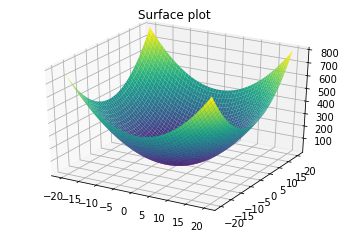

In [5]:
x1 = np.outer(np.linspace(-20, 20, 200), np.ones(200))
x2 = x1.copy().T
f = evaluate_multivariate_function(x1,x2)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x1, x2, f,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

As stated, an attractive property of the gradient is that it points in the direction of the steepest incline (so the negative gradient points in the direction of the steepest decline). This is described in mathematical detail here: https://mathcs.clarku.edu/~djoyce/ma131/directional.pdf
<br>
A natural algorithm to find a local optimal (minimal) solution is to use the gradient information in order to descend from a point to the lowest point in the surface (relative to the start point). This algorithm is known as the gradient descent algorithm. A varient of this algorithm is known as the stochastic gradient descent algorithm, which is the workhorse of modern machine learning based techniques. Details of gradient descent can be found here: https://en.wikipedia.org/wiki/Gradient_descent

Simply, the gradient descent optimisation algorithm implements the following, iterative, formula:
\begin{equation}
\vec{x}_{i} = \vec{x}_{i-1} - \alpha \Delta_x
\end{equation}
By way of an example, this is implemented in tensorflow as follows:

In [6]:
x1 = tf.Variable(-10.0) 
x2 = tf.Variable(10.0) 

for i in range(50):
    with tf.GradientTape() as tape:
        y = evaluate_multivariate_function(x1, x2)
    grads = tape.gradient(y, [x1, x2])
    print ('y = {:.1f}, x1 = {:.1f}, x2 = {:.1f},  grads0 = {:.1f}, grads1 = {:.1f} '.format(y.numpy(), x1.numpy(), x2.numpy(), grads[0].numpy(), grads[1].numpy()))
    x1.assign(x1 - 0.1*grads[0].numpy())
    x2.assign(x2 - 0.1*grads[1].numpy())

y = 200.0, x1 = -10.0, x2 = 10.0,  grads0 = -20.0, grads1 = 20.0 
y = 128.0, x1 = -8.0, x2 = 8.0,  grads0 = -16.0, grads1 = 16.0 
y = 81.9, x1 = -6.4, x2 = 6.4,  grads0 = -12.8, grads1 = 12.8 
y = 52.4, x1 = -5.1, x2 = 5.1,  grads0 = -10.2, grads1 = 10.2 
y = 33.6, x1 = -4.1, x2 = 4.1,  grads0 = -8.2, grads1 = 8.2 
y = 21.5, x1 = -3.3, x2 = 3.3,  grads0 = -6.6, grads1 = 6.6 
y = 13.7, x1 = -2.6, x2 = 2.6,  grads0 = -5.2, grads1 = 5.2 
y = 8.8, x1 = -2.1, x2 = 2.1,  grads0 = -4.2, grads1 = 4.2 
y = 5.6, x1 = -1.7, x2 = 1.7,  grads0 = -3.4, grads1 = 3.4 
y = 3.6, x1 = -1.3, x2 = 1.3,  grads0 = -2.7, grads1 = 2.7 
y = 2.3, x1 = -1.1, x2 = 1.1,  grads0 = -2.1, grads1 = 2.1 
y = 1.5, x1 = -0.9, x2 = 0.9,  grads0 = -1.7, grads1 = 1.7 
y = 0.9, x1 = -0.7, x2 = 0.7,  grads0 = -1.4, grads1 = 1.4 
y = 0.6, x1 = -0.5, x2 = 0.5,  grads0 = -1.1, grads1 = 1.1 
y = 0.4, x1 = -0.4, x2 = 0.4,  grads0 = -0.9, grads1 = 0.9 
y = 0.2, x1 = -0.4, x2 = 0.4,  grads0 = -0.7, grads1 = 0.7 
y = 0.2, x1 = -0.3, x

We can see that by following the direction of the negative gradient, with step size $\alpha$, we have been able to find the local minimum of this function. (Why "local"? Well. the overall minimum of any complex function may not be the one that the gradient descent algorithm finds - it may have found a suboptimal solution, for the given initial conditions.)

## Linear regression model and gradient descent: predicting numerical variables - revisited

In week 6, we introduced a linear regression model. In general, regression models allow one to _predict_ the value of a **numerical** dependent variable from several _independent_ **numerical** variables.

Let's start by defining a linear model $y=ax+b$ ($weight = a \times height + b$) as a python 'class':

In [7]:
class LinearModel:
    def __init__(self):
        self.a = tf.Variable(16.0) # Default value of a = 16.0
        self.b = tf.Variable(10.0) # Default value of b = 10.0

    def __call__(self, x):
        return self.a * x + self.b # Linear model y = ax + b

Now, let's synthetically generate some weight-height data, where $a = 2.0$ and $b = 70$.

In [8]:
TRUE_a = 2.0 # slope
TRUE_b = 70.0 # intercept

NUM_EXAMPLES = 1000

X = tf.random.normal(shape=(NUM_EXAMPLES,))
noise = tf.random.normal(shape=(NUM_EXAMPLES,))
y = X * TRUE_a + TRUE_b + noise

Now we will define the *loss* function, using least squares expression (minimising the energy required to "stretch" the strings):

In [9]:
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

Now, let's define a *training* procedure (i.e. a mechanism for estimating the parameters $a$ and $b$), based on gradient descent:

In [10]:
def train(model, X, y, lr=0.01):
    with tf.GradientTape() as t:
        current_loss = loss(y, model(X))
    da, db = t.gradient(current_loss, [model.a, model.b])
    model.a.assign_sub(lr * da)
    model.b.assign_sub(lr * db)

Let's bring all of this together:

Epoch 0: Loss: 3778.8125, W: 13.207354545593262, b: 21.93859100341797
Epoch 1: Loss: 2425.074462890625, W: 10.972184181213379, b: 31.50226593017578
Epoch 2: Loss: 1556.4359130859375, W: 9.18316650390625, b: 39.1634521484375
Epoch 3: Loss: 999.0658569335938, W: 7.751217842102051, b: 45.30060577392578
Epoch 4: Loss: 641.4240112304688, W: 6.605047225952148, b: 50.21689224243164
Epoch 5: Loss: 411.93975830078125, W: 5.687602996826172, b: 54.155174255371094
Epoch 6: Loss: 264.6890563964844, W: 4.953227519989014, b: 57.31000518798828
Epoch 7: Loss: 170.20425415039062, W: 4.365379333496094, b: 59.83723831176758
Epoch 8: Loss: 109.57709503173828, W: 3.8948142528533936, b: 61.86172103881836
Epoch 9: Loss: 70.6750717163086, W: 3.5181260108947754, b: 63.483463287353516
Epoch 10: Loss: 45.71322250366211, W: 3.216580867767334, b: 64.78258514404297
Epoch 11: Loss: 29.696197509765625, W: 2.9751851558685303, b: 65.8232650756836
Epoch 12: Loss: 19.418710708618164, W: 2.781937599182129, b: 66.6569137573

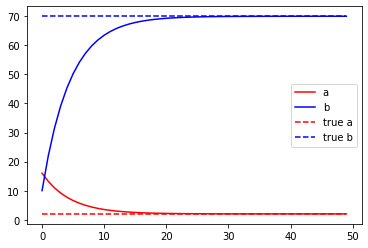

In [11]:
model = LinearModel()
aStore, bStore = [], []
trainingIterations = 50

for epoch in range(trainingIterations):
    aStore.append(model.a.numpy())
    bStore.append(model.b.numpy())
    current_loss = loss(y, model(X))
    train(model, X, y, lr=0.1)
    print(f"Epoch {epoch}: Loss: {current_loss.numpy()}, W: {model.a.numpy()}, b: {model.b.numpy()}")

plt.plot(range(trainingIterations), aStore, 'r', range(trainingIterations), bStore, 'b')
plt.plot([TRUE_a] * trainingIterations, 'r--', [TRUE_b] * trainingIterations, 'b--')
plt.legend(['a', 'b', 'true a', 'true b'])
plt.show()

## Regression tensorflow simplications

Instead of writing all of the code to define the model and to perform optimisation, we can instead use tensorflow to represent the simple linear network that we defined above:

In [12]:
layer0 = tf.keras.layers.Dense(units=1, input_shape=[1])
tfmodel = tf.keras.Sequential([layer0]) 
tfmodel.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

We can now fit the model using tensorflow "fit" function:

In [13]:
history = tfmodel.fit(X,y,epochs=100,verbose=False)

Let's look at the loss as a function of iteration count:

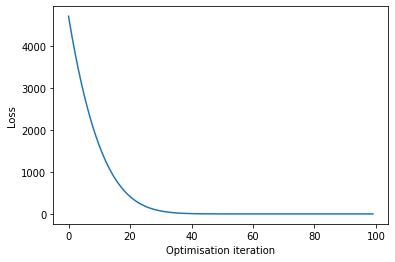

In [14]:
plt.xlabel('Optimisation iteration')
plt.ylabel("Loss")
plt.plot(history.history['loss'])
plt.show()

theta0: [70.008766] theta1: [1.9927973]


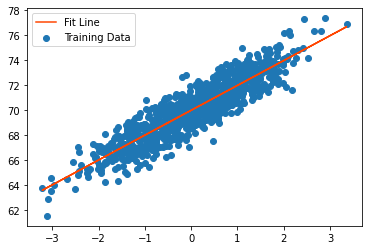

In [15]:
weights = layer0.get_weights()
theta1 = weights[0][0]
theta0 = weights[1]
print('theta0: {} theta1: {}'.format(theta0, theta1))
y_learned = X * theta1 + theta0 
plt.scatter(X, y, label='Training Data')
plt.plot(X, y_learned, color='orangered', label='Fit Line')
plt.legend() 
plt.show()

This _network_ based thought process underpins Deep Neural Networks. Tensorflow has been developed to allow data scienctists to create such neural networks, with simplified python interfaces, and generically applicable optimisation functions, allowing us to compute parameters of deep neural networks using a combination of function convolutions, the chain rule for differentiation, and (specialised forms of) gradient descent. We will explore this in more detail now.

## Interlude: Bernoulli distribution and coin tossing

Let's compute the following probabilities:
* Tossing T with a fair coin
* Tossing HH with a fair coin
* Tossing HT with a fair coin
* Tossing HTH with a fair coin
* Tossing H with a biased coin ($p(head) = \lambda = 0.1$)
* Tossing HT with a biased coin ($p(head) = \lambda = 0.1$)

Now we'll (informally) introduce the concept of a random variable, denoted $C$, where $C=0$ corresponds to coin landing on heads and $C=1$ corresponds to coin landing on tails. The probability of $C=1$ is equal to $\lambda$. If $\lambda=0.5$ then the coin is unbiased (and we're maximally uncertain about the outcome of a coin toss.

We can say that $C$ follows a Bernoulli distribution, with *probability mass function* equal to the following expression:
\begin{equation}
p(C|\lambda) = \lambda^{C}(1-\lambda)^{1-C}
\end{equation}

## Logistic regression - binary classification

Consider the scenario where we wish to partition objects into two categories (e.g. spam or not spam, fraud or not fraud, positive sentiment or negative sentiment, face present or face not present, ...) given a set of attributes. The simplest (and widest used) model to achieve this is known as a Logistic Regression model. The Logistic Regression model "squashes" the output of a linear regression model, so that the resultant squashed output is between $0$ and $1$. This "squashed" output can be interpreted as a class probabaility (e.g. probability of spam or not spam). So what is the squashing function? 

### Sigmoid function

$sigm(\eta)$ is known as the sigmoid function (also known as the _logistic_ or _logit_ function):

\begin{equation}
sigm(\eta) = \frac{1}{1+e^{-\eta}} = \frac{e^{\eta}}{e^{\eta}+1}
\end{equation}

This function has the property that is "squashes" any input (from $-\infty < \eta < \infty$) to a value between 0 and 1.

We can use the Bernouilli expression introduced above to model input data and (probabilistically) ascertain whether the data are from one class or another:

\begin{equation}
\prod_{i=1}^{N} Ber(C_{i}|sigm(\theta x_{i})) = \prod_{i=1}^{N} \left[\frac{1}{1+e^{-\theta x_{i}}} \right]^{C_{i}} \left[1-\frac{1}{1+e^{-\theta x_{i}}} \right]^{1-C_{i}}
\end{equation}

So how do we estimate model parameters $\theta$? What is the loss function?

### Cross-entropy loss

Let's introduce entropy: https://en.wikipedia.org/wiki/Entropy_(information_theory). Entropy can be considered to be a measure of uncertainty. For example, in the case of coin tossing, the value oof $\lambda$ that maximises entropy is $\lambda = 0.5$ - we are maximally uncertain about the outcome of the "experiment". We therefore want to chose a value of $\theta$ (in the above model) that minimises *cross entropy loss*:
\begin{equation}
c(\theta) = -\frac{1}{N}\sum_{i=1}^{N} \left[C_{i}log\hat{C}_{i}+(1-C_{i})log(1-\hat{C}_{i})\right]
\end{equation}

where:
\begin{equation}
\hat{C}_{i} = \frac{1}{1+e^{-\theta x_{i}}}
\end{equation}

In order to compute the optimal value of $\theta$ that minimises the cross entropy loss, we use the chain rule (differentiation of composed functions) and gradient descent. Next week, we will use tensorflow to achieve this.

***
Mandatory exercises:

- [ ] Carefully read the material above, and ask questions over email.
- [ ] Replicate all of the code in this notebook.